In [1]:
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import time
from tqdm import tqdm
import random
from sklearn.preprocessing import StandardScaler

In [2]:
#画图设定与随机数设定
%config InlineBackend.figure_format = "svg"
np.random.seed(0)
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
#造一堆小白鼠数据
temp_dict = {
    'weights': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'size': [0.12,0.18,0.33,0.46,0.44,0.5,0.75,0.8,0.85,1.2],
    'obese' : [0,0,0,0,1,0,1,1,1,1]
}
data_mouse = pd.DataFrame(temp_dict)

In [4]:
x1 = np.random.random(30)*0.3
y1 = x1+np.random.random(30)*0.2
x2 = np.random.random(30)*0.3 +0.5
y2 = x2 +np.random.random(30)*0.2

In [5]:
model = LinearRegression()
model.fit(np.append(x1,x2).reshape(-1,1),np.append(y1,y2))
model1 = LinearRegression()
model1.fit(data_mouse['weights'].values.reshape(-1, 1),data_mouse['size'].values.reshape(-1, 1))

LinearRegression()

# Logistic Regression




## 故事背景
在实验室有一群小白鼠，我们可以观察到每一只小白鼠的体重(weight)与体型大小(size),并且可以对他们进行回归从而发现他们体重与体型之间存在正相关的关系。这是我们很熟悉的**线性回归**。    
假如实验室的伙食很好，其中一部分小白鼠通过检测发现他们得了**肥胖症**，我们需要把得了肥胖症的小白鼠和正常的小白鼠分开，通过调节肥胖症小白鼠的伙食来帮助他们恢复健康。可问题是检测的费用很高，不能对所有的小白鼠都检测一遍，该怎么做呢？这时候就需要**逻辑回归**来输入每只小白鼠的体重，输出小白鼠得肥胖症的概率来帮助我们判断。

### 小白鼠数据

In [6]:
data_mouse
#0表示没有肥胖症，1表示有

,weights,size,obese
0,0.1,0.12,0
1,0.2,0.18,0
2,0.3,0.33,0
3,0.4,0.46,0
4,0.5,0.44,1
5,0.6,0.50,0
6,0.7,0.75,1
7,0.8,0.80,1
8,0.9,0.85,1
9,1.0,1.20,1


### 最小二乘估计

![jupyter](./linearRegression.svg)

其中浅蓝色的点为非肥胖的小白鼠，深蓝色点为有肥胖的小白鼠

建立一条$y=kx+b$的直线，使得每点到直线的残差平方和最小，就是我们常用的最小二乘估计

从图中可以明显看出weights与size之前存在正相关关系，而无法得到是否肥胖，只能看出**体重越大的小白鼠，患有肥胖症的概率就越大**，而这个概率能否通过什么办法直接表示出来呢？

### 概率转化曲线(直观感受)

![jupyter](./123.svg)

我们将小白鼠的体重作为x轴，肥胖的概率作为y轴，可以画出上图。    
（其中没有肥胖的小白鼠概率为0，有肥胖的小白鼠概率为1）

随便给定一条曲线，对应每一个x(weights)可以输出每只小白鼠的y(患有肥胖的概率)    
例如，图中体重为0.4的小白鼠对应的肥胖概率大约为25%

## 事件几率（odds）
定义为事件发生的概率除以事件不发生的概率
$$
odds = \frac{P}{1-P}\\
P = \frac{e^{log(odds)}}{1+e^{log(odds)}}
$$

## 逻辑回归与极大似然

![jupyter](./321.svg)

![jupyter](./分类线.svg)

将右图的概率轴通过 $log(odds) = log(\frac{P}{1+P})$ 可以得到左图     
**可以看出 P从0走向1时，log(odds)也从负无穷走向正无穷**  
其中非肥胖的小白鼠P=0，log(0/1)本不存在可以视为无限接近负无穷（图中用-10表示）   
其中非肥胖的小白鼠P=1，log(1/0)本不存在可以视为无限接近正无穷（图中用+10表示）   

![jupyter](./1.svg)

在之前的左图中，**假设我们可以找到一条直线，即$log(odds)= kx+b$来拟合这些点**。使得残差平方和最大似乎是不可行的，因为每个点的y值都接近无穷。所以要换一个思路。

### 极大似然

![jupyter](./2.svg)

随机给定一条直线 $y = 10x - 5 $,我们将第一只weights 0.1 对应到直线上点（0.1,-4）    
通过$\large P = \frac{e^{log(odds)}}{1+e^{log(odds)}}$ 可以算出 P(肥胖)为$\frac{e^{-4}}{1+e^{-4}}=0.018$    
相对应的，P(非肥胖)=0.982   

同理我们可以通过一条给定的直线来计算出每个小白鼠对应的肥胖和非肥胖的概率     
将不同类的小白鼠对应的概率算出(非肥胖的就用1-P，肥胖的就用P)，将他们的概率相乘，就能得到所有样本在这条直线上的**最大似然概率**。

$$
log(odds)= kx+b\\
P = \frac{e^{log(odds)}}{1+e^{log(odds)}}
$$
可以得出
$$
P = \frac{e^{kx+b}}{1+e^{kx+b}}
$$

![jupyter](./2.svg)

![jupyter](./3.svg)

在给定直线下，我们可以把所有小白鼠的P计算出来并得出一个乘积，作为我们的目标函数，通过不断调整左图直线方程，来使概率乘积达到最大，是我们最终的目标。    
在调整的过程中，左边的直线会一直旋转，右边的曲线图形也会相应的调整。最终达到最大。

## 逻辑回归的曲线数学由来（GLM）

### 逻辑回归的分布假设
* y在x下的条件概率属于指数分布族
* 拟合函数满足h(x)=E(y|x)
* 自然参数$\eta$与x是线性关系,即$\eta = w^{T}x$ 

广义线性模型是一种应用灵活的线性模型，它认为因变量是属于指数簇分布的（可理解为是一种限制），即对于输入的 X，Y 具有如下形式的分布：
$$
\large = p(Y|\eta) = b(Y)e^{\eta^{T}T(Y)-\alpha(\eta)},\eta=W^{T}X
$$

假设Y服从伯努利分布，形式如下
$$
p(Y=y;\phi)=\phi ^{y}(1-\phi)^{1-y},y=0,1
$$
有
$$
p(Y=y;\phi)\\
=\phi^{y}(1-\phi)^{1-y}\\
\large=e^{ln\phi^{y}(1-\phi)^{1-y}}\\
\large=e^{yln\frac{\phi}{1-\phi}+ln(1-\phi)}\\
$$

对应指数分布簇分布可得：
$$
b(Y)=1\\
T(Y)=y\\
\eta=ln\frac{\phi}{1-\phi}\\
\phi = \frac{e^{\eta}}{1+e^{\eta}}\\
\alpha(\eta) = -ln(1-\phi)
$$

拟合函数:
$$
h_{\theta}(x)= E(T(Y)) = E(Y) = \phi =\frac{e^{\eta}}{1+e^{\eta}}\\
=\frac{e^{w^{T}x}}{1+e^{w^{T}x}}
$$

## Logistic分布
**分布函数：**
$$  
F(x)=P(X\leq x)=\frac{1}{1+e^{\frac{-(x-\mu)}{\gamma}}} 
$$

其中$\mu$改变函数的位置，$\gamma$改变函数的形状

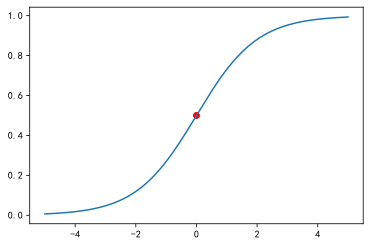

In [9]:
# 参数为（0,1）时的分布函数图
x = np.linspace(-5,5,1000)
y = 1/(1+np.exp(-x))
plt.plot(x,y,label ='F(X)')
plt.scatter(x=0,y=0.5,c='r')

**特点**    
可以看出对他输入任意一个数，都能转化到0-1的一个值，为概率，且在0的时候值正好为0.5    相比于阶跃函数，logistic函数分布可以求导

**密度函数：**
$$
f(x)=F'(X\leq x) = \frac{e^{\frac{-(x-\mu)} {\gamma}}}{\gamma(1+e^{\frac{-(x-\mu)}{\gamma}})^2} 
$$

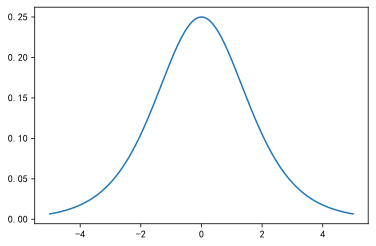

In [10]:
# 参数为（0,1）时的密度函数图
x = np.linspace(-5,5,1000)
y = np.exp(-x)/(1+np.exp(-x))**2
plt.plot(x,y)

*p.s.在参数为（0,1）的时候函数图像其实就是我们熟悉的**sigmoid**函数    
(参考神经网络激活函数那章）*

## 二项回归
$$
P(Y=1|X) = \frac{e^{\omega^{T}x}}{1+e^{\omega^{T}x}}
$$
$$
P(Y=0|X) = \frac{1}{1+e^{\omega^{T}x}}
$$

*其中$\omega = (\omega_{1},....\omega_{n},d)$,$ x=(x_{1},....,x_{n},1)^{T}$*

可以发现事件发生几率的对数概率是由输入x的线性函数表示。

对输入x进行分类的线性函数$ω^{T}x$可以转化为$\large P(Y=1|X) = \frac{e^{\omega^{T}x}}{1+e^{\omega^{T}x}}$,线性函数的值越接近无穷，概率越接近1。线性函数的值越接近负无穷，概率值越接近0

## 模型参数估计

### 最大似然估计 & 梯度下降法
* 目标函数
$$
似然函数=\prod{[P(Y=1|X)^{y_{i}}][P(Y=0|X)^{1-y_{i}}]}
$$
* 取对数后的目标函数
$$
J(\omega)=\sum^{n}_{i=1}(y_{i}lnp(x_{i})+(1-y_{i})ln(1-p(x_{i}))   
 =\sum^{n}_{i=1}y_{i}(\omega^{T}x_{i})-ln(1+e^{\omega^{T}x_{i}})
$$

对$w_{j}$求导得
$$
=\sum^{n}_{i=1}(y_{i}-P(Y=1|X))x_{j}
$$
更新wj的值
$$
w_{j}^{'}=w_{j} - \alpha \sum^{n}_{i=1}(y_{i}-P(Y=1|X))x_{j}
$$

矩阵大法

$$
Y = \left\{ \begin{matrix} 
y_{1} \\ \vdots \\y_{n}
\end{matrix} \right\}
$$


$$
X = \left\{ \begin{matrix} 
x_{11}\cdots x_{1m} & 1 \\ \vdots \\x_{n1}\cdots x_{nm} & 1
\end{matrix} \right\}
$$

$$
W = \left\{ \begin{matrix} 
w_{1} \\ \vdots \\w_{n} \\b
\end{matrix} \right\}
$$

$$
W = W - \alpha X^{T} (\frac{e^{XW}}{1+e^{XW}} -Y)
$$

对w中每一个值求导并梯度下降，最后会收敛到最小值

### （补充）损失函数为什么不用最小二乘

概率函数是sigmoid（非线性）形式时，损失函数求导会出现多个一阶导数为0的极值点，用梯度下降法有可能会陷入局部最小而到不了全局最小
* 最小二乘下的损失函数示意图

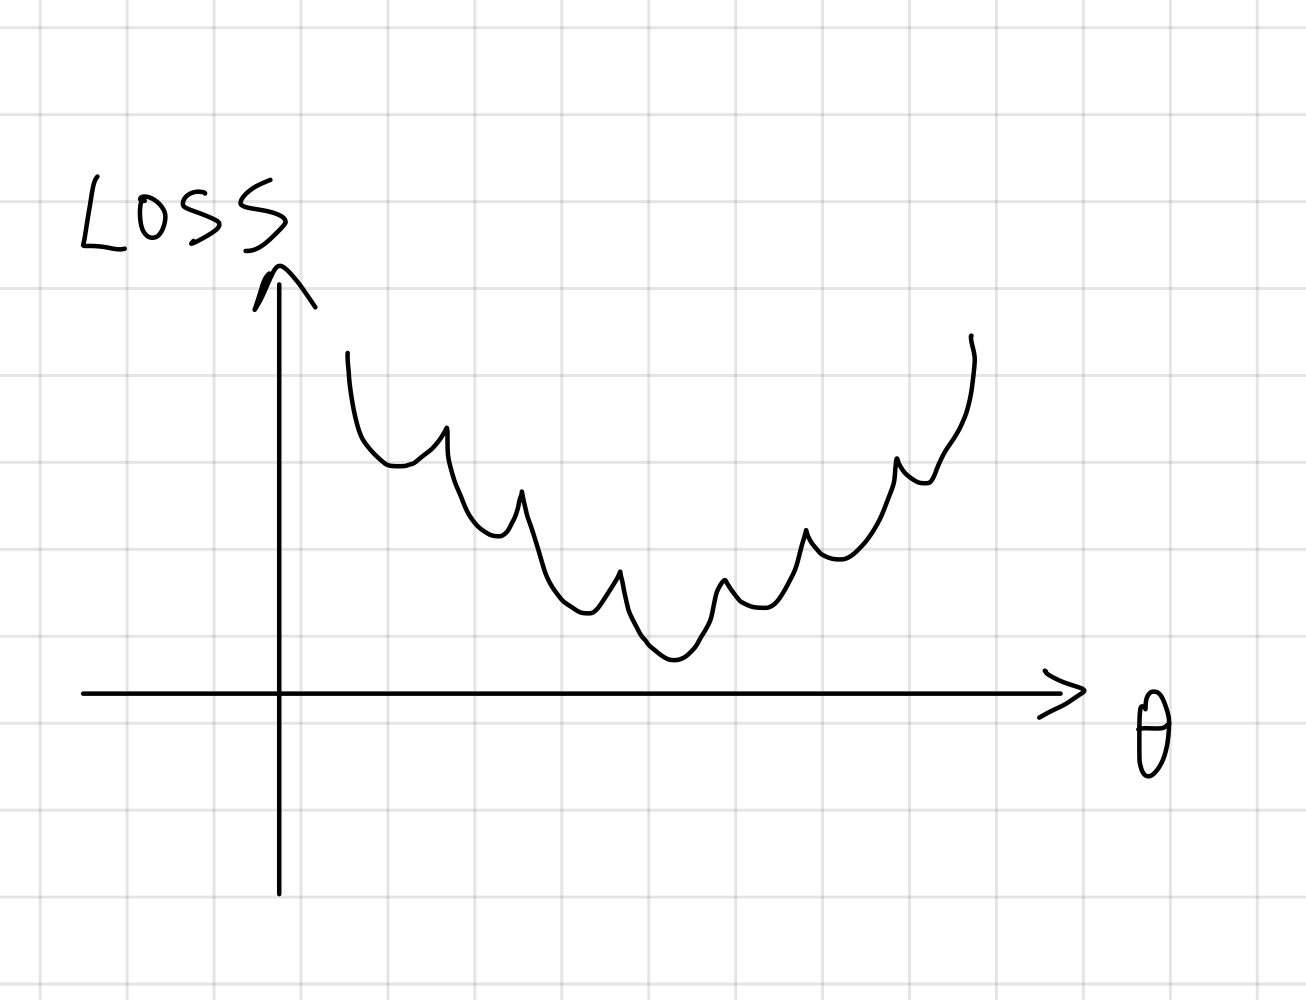

而最大似然损失函数只有一个极值点

* 最大似然损失函数示意图
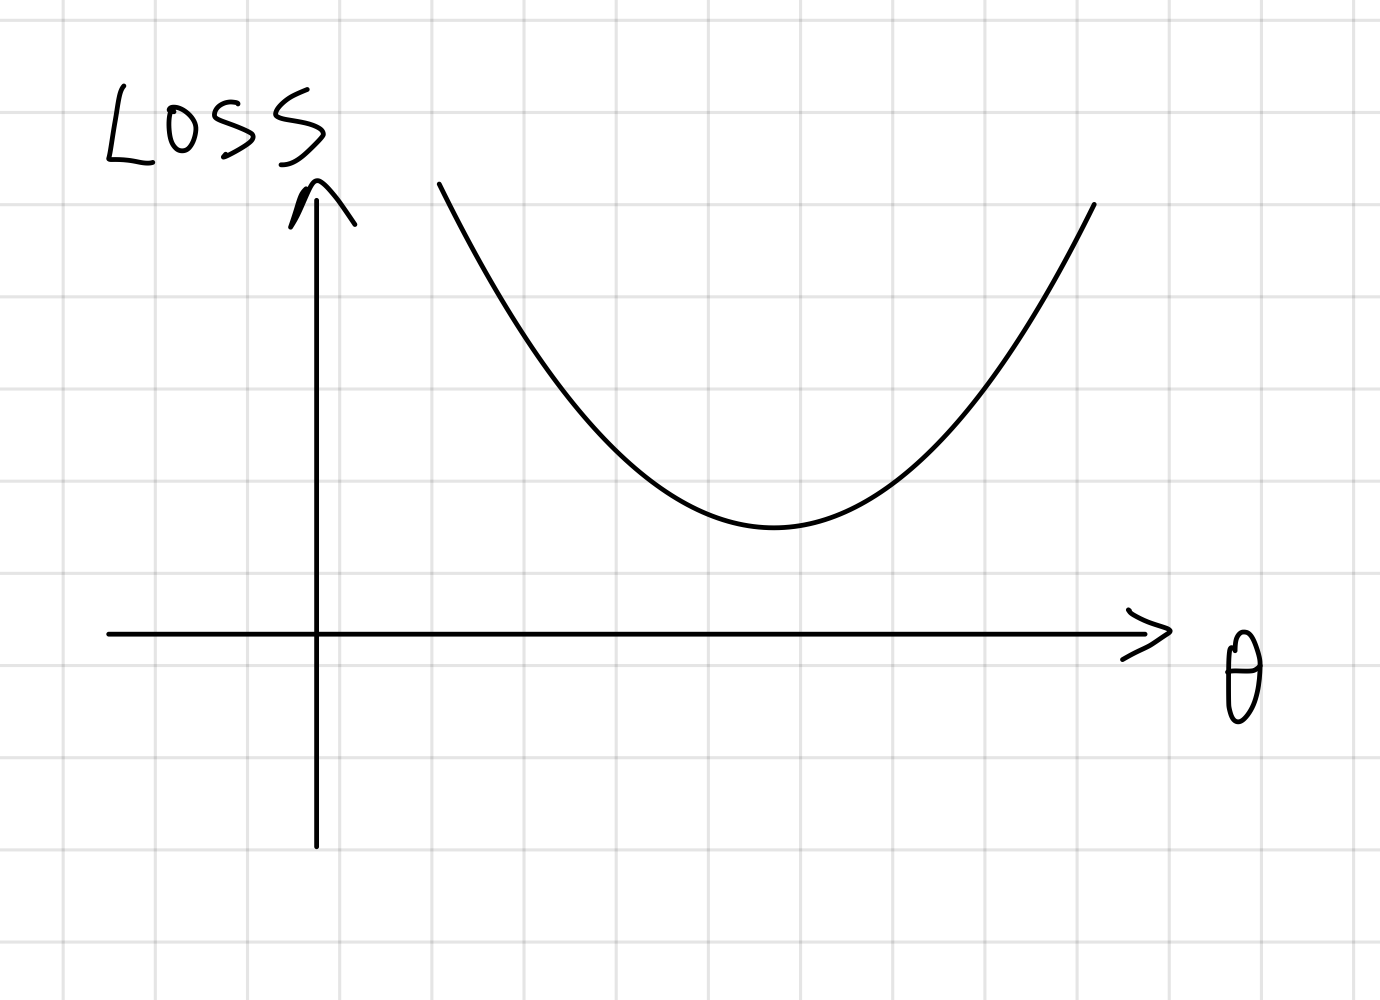

# 上代码

In [11]:
#参数模块
iterations = 1000
learningrate = 0.3

In [12]:
class Logitregression():
    def __init__(self):
        self.lr = learningrate 
        self.iters = iterations
        self.w_lst= []
        self.loss_lst = []
    
    #初始化权重，顺便加个常数
    def initialize_weights(self,n_features):
        w = np.random.random((n_features,1))
        b = 0
        #把b的值放到w后面
        self.w =np.insert(w,n_features,b,axis=0)
    
    #返回分类为1的概率
    def true_prob(self,x):
        return np.exp(x)/(1+np.exp(x))
    
    #更新学习率，暂定用的线性更新法
    def update_lr(self,iters):
        return learningrate - (learningrate-0.01)/self.iters*iters

    def fit(self,x,y):
        m_samples,n_features = x.shape
        self.initialize_weights(n_features)
        #x也增加一列常数项
        tempone = np.ones((x.shape[0],1))
        x = np.hstack((x,tempone))
#         y = np.reshape(y(m_samples,1))
        #梯度训练
        #mini batch
        for i in range(self.iters):
#             self.plot_process()
            random_n = random.sample(range(m_samples),5) #mini batch 抽样5个
            temp_x = x[random_n]
            temp_y = y[random_n]
            h_x = temp_x.dot(self.w) #5,2@2,1 （X*W）
            y_pred =self.true_prob(h_x)  #5,1      （返回X*W为1类的概率）
            w_grad = temp_x.T.dot(y_pred - temp_y)  #2,5@5,1（计算梯度）
            self.w = self.w - self.lr * w_grad #更新W权重
            self.w_lst.append(self.w) 
            total_loss = np.exp(sum(y*x.dot(self.w) - np.log(1+np.exp(x.dot(self.w))))[0])
            self.loss_lst.append(total_loss)
            self.lr = self.update_lr(i)
# batch    
#         for i in range(self.iters):
# #             self.plot_process()
           
#             h_x = x.dot(self.w) #5,2@2,1
#             y_pred =self.true_prob(h_x) #5,1
#             w_grad = x.T.dot(y_pred - y) #2,5@5,1
#             self.w = self.w - self.lr * w_grad 
#             self.w_lst.append(self.w)
#             total_loss = np.exp(sum(y*x.dot(self.w) - np.log(1+np.exp(x.dot(self.w))))[0])
#             self.loss_lst.append(total_loss)
#             self.lr = self.update_lr(i)
    
    #预测x为1的概率
    def predict(self,x):
        tempone = np.ones((x.shape[0],1))
        x = np.hstack((x,tempone))
        return np.round(self.true_prob(x.dot(self.w)),2)
    
    #返回预测精确度
    def accuracy(self,x,y):
        result = self.predict(x)
        y_pred = result > 0.5
        return np.round((sum(y_pred == y))[0]/len(y),2)
    
    def plot_loss(self):
        plt.plot(range(self.iters),self.loss_lst)
        
    def plot_process(self):
        plt.cla()
        plt.xlim(0, 1)
        plt.ylim(-0.1, 1.1)
        plt.scatter(data_mouse[data_mouse['obese']==0]['weights'],data_mouse[data_mouse['obese']==0]['obese'],c='lightblue')
        plt.scatter(data_mouse[data_mouse['obese']==1]['weights'],data_mouse[data_mouse['obese']==1]['obese'],c='darkblue')
        plt.plot(np.linspace(0,1,100),np.exp(np.linspace(0,self.weights[0],100)+self.weights[1])/(1+np.exp(np.linspace(0,self.weights[0],100)+self.weights[1])),label = 'Linear Regression',c='r')
        plt.xlabel('weights')
        plt.ylabel('obese')
        plt.pause(0.05)

In [13]:
#小白鼠模块
model_LR = Logitregression()
model_LR.fit(data_mouse['weights'].values.reshape(-1,1),data_mouse['obese'].values.reshape(-1,1))

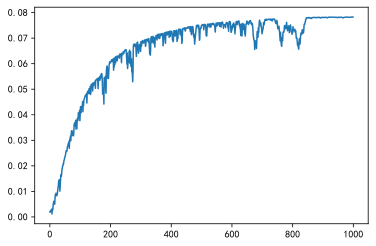

In [14]:
model_LR.plot_loss()

In [15]:
model_LR.w

array([[10.87546098],
       [-5.93909126]])

In [16]:
model_LR.accuracy(data_mouse['weights'].values.reshape(-1,1),data_mouse['obese'].values.reshape(-1,1))

0.8

## 金融实例之 ST股识别
（感谢徐总辛苦收集的数据）

In [17]:
df = pd.read_excel('st_data.xlsx')
df["label"] = 0
df["label"][df['类别'] =="非ST"] = 1

<ipython-input-17-24fb8c3bbd0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][df['类别'] =="非ST"] = 1


In [18]:
df.head(5)

,证券代码,证券名称,X1,X2,X3,X4,X5,Z值,描述,类别,label
0,600077.SH,宋都股份,7.6318,-11.5107,-5.6453,883.8570,93.2577,5.9789,良好,ST,0
1,600091.SH,*ST明科,-17.6766,-60.3002,-64.2778,357.9314,2.4822,-1.0051,堪忧,ST,0
2,600131.SH,国网信通,-14.4749,-3.1694,0.3212,248.7245,21.2826,1.4975,堪忧,ST,0
3,600145.SH,*ST新亿,5.1982,-52.9654,-20.0175,737.5027,27.2762,3.3578,良好,ST,0
4,600179.SH,安通控股,-26.2130,-5.5661,-11.4876,218.3871,79.4161,1.3321,堪忧,ST,0


其中特征分别为：    
x1= 净营运资本 / 总资产    
x2= 留存收益 / 总资产    
x3 = 息税前收益/ 总资产    
X4 = 优先股和普通股市值 /总负债    
X5 = 销售额 / 总资产    

In [19]:
scaler = StandardScaler()
scaler.fit(df[['X1','X2','X3','X4','X5']])
st_x = scaler.transform(df[['X1','X2','X3','X4','X5']])
st_y = df['label'].values.reshape(-1,1)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(st_x,st_y,test_size=0.3,random_state= 0)

In [21]:
model_st = Logitregression()
model_st.fit(x_train,y_train)

In [22]:
model_st.w

array([[ 1.18971465],
       [ 3.64040636],
       [10.20399511],
       [-0.37021037],
       [ 0.53377111],
       [-1.58349147]])

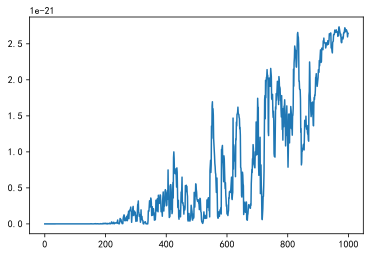

In [23]:
model_st.plot_loss()

In [24]:
model_st.accuracy(x_test,y_test)

0.96

# 总结    

## 逻辑回归优点：
* 模型简单，输出直观
* 可以直接输出分类概率

## 逻辑回归缺点：
* 大多数样本要线性可分
* 本质上是一个线性分类器，处理不了特征之间相关的情况
* 特征空间大时，精度会下降（可以先筛选特征）



# 补充：广义线性模型推导逻辑回归

~~以下是垃圾回收站：说不定用得到~~

In [25]:
# batch test 1，有点大冰
# class Logitregression():
# #初始化函数  
#     def __init__(self):
#         self.lr = learningrate
#         self.iters = iterations
#         self.loss =[]    #用于存放目标函数
#         self.lr_lst =[]   #用于存放学习率
#         self.weights_lst =[]   #用于存放权重
#         self.w1_qd =[]

# #更新学习率函数，暂定用的线性
#     def update_lr(self,iters):
#         return learningrate - (learningrate-0.001)/self.iters*iters
    
#     def fit(self,x,y):
#         self.tempone = np.ones((x.shape[0],1))
#         self.traindata = np.hstack((x,self.tempone))
#         #随机初始权重
#         self.weights = np.random.random(self.traindata.shape[1])
# #         self.weights = np.array([10,-10])
#         #总循环
#         for i in tqdm(range(self.iters)):
#         #对权重每个值循环
#             for j in range(len(self.weights)):
#                 a = np.exp(self.traindata.dot(self.weights.reshape(-1,1)))/(np.exp(self.traindata.dot(self.weights.reshape(-1,1)))+1)
#                 a.reshape(-1,1)
#                 b = ((y - a )*self.traindata[:,j].reshape(-1,1)).sum()/x.shape[0]
#                 self.weights[j] = self.weights[j] + self.lr*b
# #             self.plot_process()
#             self.w1_qd.append(b)
#             self.lr_lst.append(self.lr)
#             self.lr = self.update_lr(i)
#             temp_loss = (y.reshape(-1,1)*(self.traindata.dot(self.weights.reshape(-1,1))) - np.log(1+np.exp(self.traindata.dot(self.weights.reshape(-1,1))))).sum()
            
#             self.loss.append(temp_loss)
#             weights =self.weights.copy()
#             self.weights_lst.append(weights)
    
#     def predict(self,x):
#         self.tempone = np.ones((x.shape[0],1))
#         x = np.hstack((x,self.tempone)) 
#         return np.exp(x.dot(self.weights.T))/(np.exp(x.dot(self.weights.T))+1)
    
#     #画图
#     def plot_loss(self):
#         plt.plot(range(self.iters),self.loss)
#         plt.show()
    
#     def plot_process(self):
#         plt.scatter(data_mouse[data_mouse['obese']==0]['weights'],data_mouse[data_mouse['obese']==0]['obese'],c='lightblue')
#         plt.scatter(data_mouse[data_mouse['obese']==1]['weights'],data_mouse[data_mouse['obese']==1]['obese'],c='darkblue')
#         plt.plot(np.linspace(0,1,100),np.exp(np.linspace(0,self.weights[0],100)+self.weights[1])/(1+np.exp(np.linspace(0,self.weights[0],100)+self.weights[1])),label = 'Linear Regression',c='r')
#         plt.show()

In [26]:
# model_LR.plot_loss()
# model_LR.plot_process()